# Modelling with FB Prophet

In [1]:
import pandas as pd
from fbprophet import Prophet

In [2]:
df = pd.read_csv('FE_data_18-19.csv', index_col=0)

In [3]:
df.columns

Index(['Location', 'JDay', 'Date', 'SsMean', 'MinTemp', 'MaxTemp', 'AvgTemp',
       'AvgRH', 'Precip', 'AvgWindSpeed', 'month', 'year', 'YearWeek', 'AvgDP',
       'logSsMean', 'AvgTemp_1', 'AvgTemp_3', 'AvgTemp_7', 'AvgRH_1',
       'AvgRH_3', 'AvgRH_7', 'AvgDP_1', 'AvgDP_3', 'AvgDP_7', 'Precip_1',
       'Precip_3', 'Precip_7', 'MaxTemp_1', 'MaxTemp_3', 'MaxTemp_7',
       'MinTemp_1', 'MinTemp_3', 'MinTemp_7', 'SsMean_1', 'SsMean_3',
       'SsMean_7', 'precip_3dTotal'],
      dtype='object')

In [9]:
# sort by date
df.sort_values(by='Date', inplace=True)

In [10]:
train_ds = pd.DataFrame()
train_ds['ds'] = pd.to_datetime(df['Date'])
train_ds['y'] = df['logSsMean']
train_ds.head()

,ds,y
0,2018-06-13,5.690478
54,2018-06-13,3.759416
1,2018-06-14,4.681205
55,2018-06-14,4.213559
2,2018-06-15,5.110631


In [11]:
prophet_basic = Prophet()
prophet_basic.fit(train_ds)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [12]:
future = prophet_basic.make_future_dataframe(periods=7)

In [13]:
forecast=prophet_basic.predict(future)

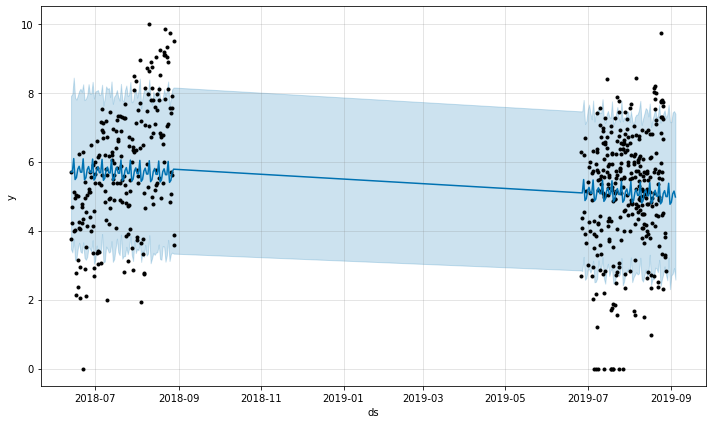

In [14]:
fig1 = prophet_basic.plot(forecast)

In [15]:
# obviously, will need to separate years

In [31]:
train_ds = df.loc[df['year'] == 2018].copy()

In [32]:
train_ds.drop(labels='SsMean', axis=1, inplace=True)
train_ds.rename(columns={'Date':'ds','logSsMean':'y'}, inplace=True)

In [33]:
# encode location
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(train_ds['Location'])
train_ds['Location'] = le.transform(train_ds['Location'])

In [34]:
train_ds.columns

Index(['Location', 'JDay', 'ds', 'MinTemp', 'MaxTemp', 'AvgTemp', 'AvgRH',
       'Precip', 'AvgWindSpeed', 'month', 'year', 'YearWeek', 'AvgDP', 'y',
       'AvgTemp_1', 'AvgTemp_3', 'AvgTemp_7', 'AvgRH_1', 'AvgRH_3', 'AvgRH_7',
       'AvgDP_1', 'AvgDP_3', 'AvgDP_7', 'Precip_1', 'Precip_3', 'Precip_7',
       'MaxTemp_1', 'MaxTemp_3', 'MaxTemp_7', 'MinTemp_1', 'MinTemp_3',
       'MinTemp_7', 'SsMean_1', 'SsMean_3', 'SsMean_7', 'precip_3dTotal'],
      dtype='object')

In [35]:
#Additional Regressor
m= Prophet()

cols = train_ds.columns.tolist()

for col in cols:
    if col == 'ds':
        continue
    elif col == 'y':
        continue
    else:
        m.add_regressor(col)

In [36]:
# split off end of 2019 as test set
test_size = train_ds.shape[0] - 14
train, test = train_ds.iloc[:test_size], train_ds.iloc[test_size:]

In [37]:
m.fit(train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [56]:
future = m.make_future_dataframe(periods=14)

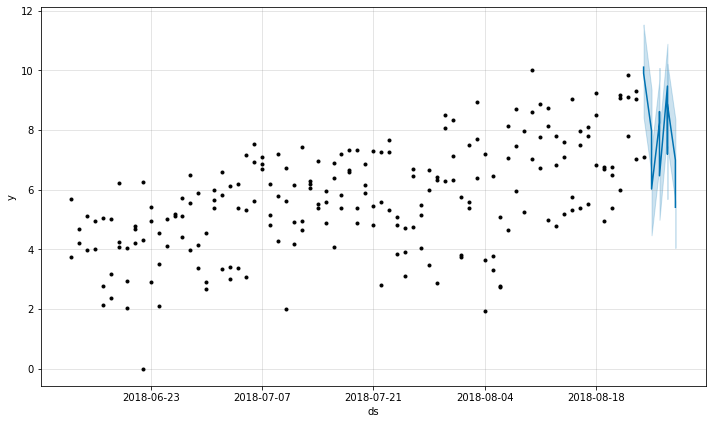

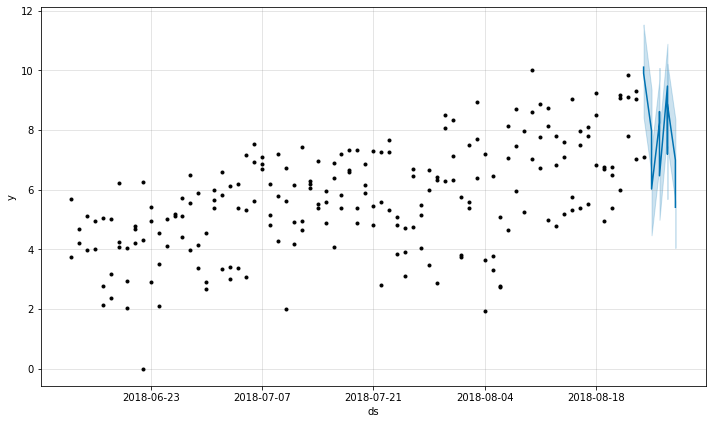

In [57]:
pred = m.predict(test)
m.plot(pred)

In [58]:
pred.shape

(14, 121)

In [47]:
test

,Location,JDay,ds,MinTemp,MaxTemp,AvgTemp,AvgRH,Precip,AvgWindSpeed,month,...,MaxTemp_1,MaxTemp_3,MaxTemp_7,MinTemp_1,MinTemp_3,MinTemp_7,SsMean_1,SsMean_3,SsMean_7,precip_3dTotal
126,1,236,2018-08-24,10.4,20.3,14.6,72.1,0.1,17.1,8,...,32.3,30.466667,28.028571,7.1,7.233333,8.342857,11190.155000,13368.913333,7921.069286,0.0
72,0,236,2018-08-24,9.5,21.3,14.7,70.3,0.3,19.5,8,...,32.0,30.433333,28.057143,6.3,5.366667,6.742857,8378.230000,8739.578333,5022.775000,0.0
73,0,237,2018-08-25,4.9,23.0,14.0,66.8,0.1,9.0,8,...,21.3,28.833333,26.328571,9.5,7.166667,6.571429,7358.795000,8252.790000,5726.103571,0.3
127,1,237,2018-08-25,4.9,23.4,13.9,68.8,0.0,9.3,8,...,20.3,28.666667,26.214286,10.4,8.900000,7.971429,3306.850000,11211.045000,7921.669286,0.1
192,2,237,2018-08-25,4.9,22.8,13.4,70.2,0.0,9.5,8,...,22.5,29.033333,25.871429,9.3,7.200000,7.271429,1214.240000,1603.422222,929.530952,0.0
74,0,238,2018-08-26,8.8,22.3,15.3,57.4,1.1,13.0,8,...,23.0,25.433333,25.928571,4.9,6.900000,6.214286,1926.760000,5887.928333,5284.006429,0.4
128,1,238,2018-08-26,9.7,22.3,15.7,55.8,0.2,11.2,8,...,23.4,25.333333,26.000000,4.9,7.466667,7.400000,16854.055000,10450.353333,8857.870714,0.1
193,2,238,2018-08-26,9.0,22.2,15.2,61.7,0.0,9.8,8,...,22.8,25.866667,25.685714,4.9,6.533333,6.757143,126.060000,826.350000,813.836667,0.0
75,0,239,2018-08-27,2.7,11.6,8.6,85.1,26.1,29.0,8,...,22.3,22.200000,25.885714,8.8,7.733333,6.957143,302.285000,3195.946667,5210.487143,1.5
194,2,239,2018-08-27,3.5,11.4,8.8,87.9,13.5,27.4,8,...,22.2,22.500000,25.728571,9.0,7.733333,7.342857,157.843333,499.381111,816.531429,0.0


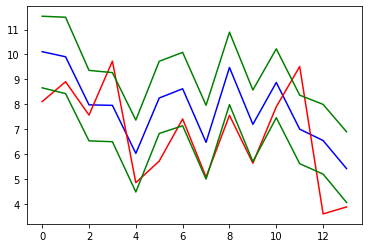

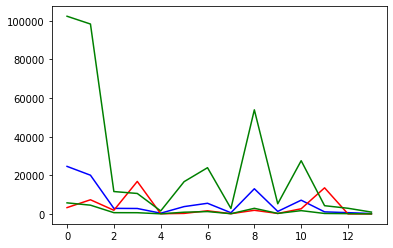

In [59]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(pred.yhat, c='b')
plt.plot(test.y.values, c='r')
plt.plot(pred.yhat_lower, c='g')
plt.plot(pred.yhat_upper, c='g')
plt.show()

plt.plot(np.exp(pred.yhat), c='b')
plt.plot(np.exp(test.y.values), c='r')
plt.plot(np.exp(pred.yhat_lower), c='g')
plt.plot(np.exp(pred.yhat_upper), c='g')
plt.show()

In [55]:
# let's try 2019

In [62]:
train_ds = df.loc[df['year'] == 2019].copy()
train_ds.drop(labels='SsMean', axis=1, inplace=True)
train_ds.rename(columns={'Date':'ds','logSsMean':'y'}, inplace=True)

le = LabelEncoder()
le.fit(train_ds['Location'])
train_ds['Location'] = le.transform(train_ds['Location'])

m = Prophet()

cols = train_ds.columns.tolist()

for col in cols:
    if col == 'ds':
        continue
    elif col == 'y':
        continue
    else:
        m.add_regressor(col)
        
# split off end of 2019 as test set
test_size = train_ds.shape[0] - 14
train, test = train_ds.iloc[:test_size], train_ds.iloc[test_size:]

m.fit(train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


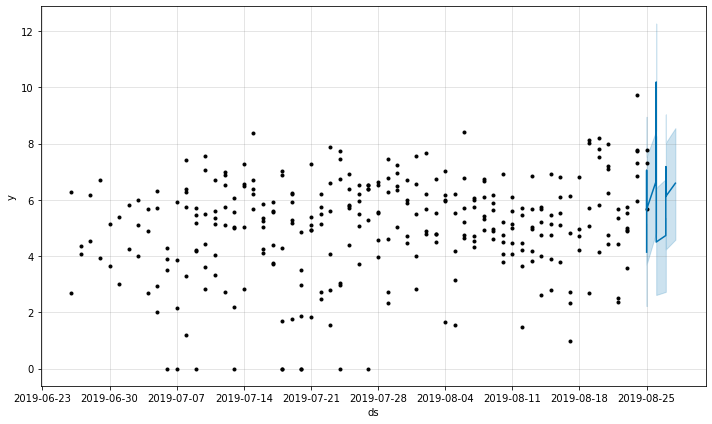

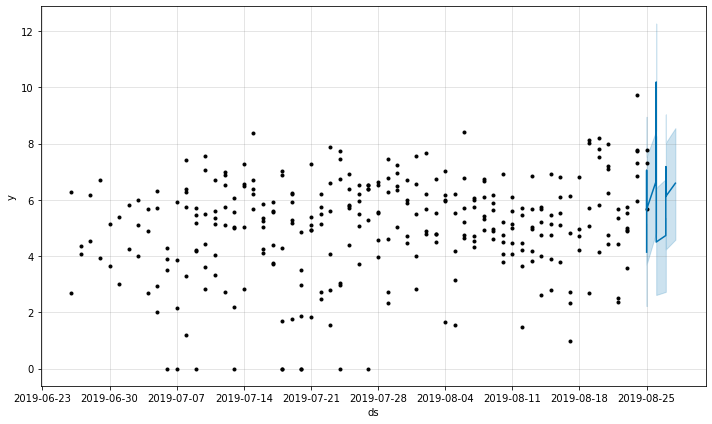

In [63]:
pred = m.predict(test)
m.plot(pred)

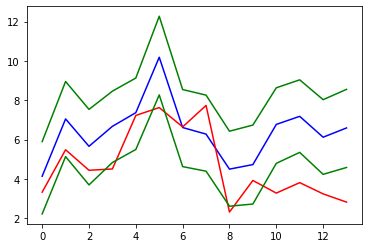

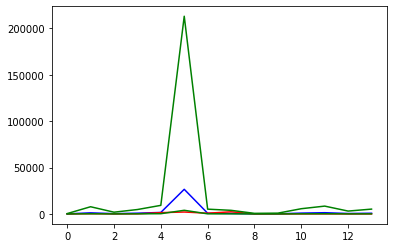

In [64]:
plt.plot(pred.yhat, c='b')
plt.plot(test.y.values, c='r')
plt.plot(pred.yhat_lower, c='g')
plt.plot(pred.yhat_upper, c='g')
plt.show()

plt.plot(np.exp(pred.yhat), c='b')
plt.plot(np.exp(test.y.values), c='r')
plt.plot(np.exp(pred.yhat_lower), c='g')
plt.plot(np.exp(pred.yhat_upper), c='g')
plt.show()